Источники вдохновения:  
1. [Google workshop](https://developers.google.com/machine-learning/clustering)  
2. [Hands-on machine learning with Scikit-learn, Keras, ...](https://drive.google.com/file/d/1VhmF1BkiPxLJISPR_jA64I17k-3xX8L9/view?usp=sharing)  
3. [sklearn oficial](https://scikit-learn.org/stable/modules/clustering.html)  
4. [длинная статья](https://link.springer.com/article/10.1007/s40745-015-0040-1)

### What's clustering

Кластеризация - это группировка неразмеченных объектов.
Если есть разметка, то кластеризация становится классификацией.
При этом нет четкого согласованного определения кластеризации)))  

Требования к кластеризации:
1. Экземпляры в одном кластере должны быть максимально похожи  
2. Экземпляры в разных кластерах должны максимально отличаться друг от друга  
3. Измерение сходства и различия должно быть четким и иметь практическое значение




Примеры использования кластеризации:  
* анализ данных, в т ч понижение размерности  
* обнаружение аномалий  
* сегментация изображений и текстов (особенно хорошо для первичной разметки)  
* анализ социальных сетей  
* сегментация пользователей  
* обобщения данных (generalization): заполнение пропущенных значений в данных на основе данных других объектов кластера  
* сжатие данных (data compression): замена данных для всех объектов кластера на айди кластера  
* сохранение конфиденциальности (privacy preservation): связывание пользовательских данных с айди кластера, а не с айди пользователей  

### Clustering Algorithms

Основа для алгоритмов кластеризации - метрики расстояния и схожести.  
Для количественных характеристик предпочтительнее расстояние, для качественных - схожесть.  

Для оценки качества кластеризации применяют показатели оценки (evaluation indicator), бывают внешние и внутренние.

Внутренние:
1. Silhouette score: сравнивает среднее расстояние для объекта до других объектов его кластера и средним расстоянием между различными кластерами.  
2. Dunn indicator  
3. Davies–Bouldin indicator  
[Формулы и объясения для двух последних](https://link.springer.com/article/10.1007/s40745-015-0040-1/tables/3)  

Внешние:  
1. Rand indicator (аналог accuracy)  
2. F-indicator (F1 score)
3. Confusion matrix  
[больше примеров с формулами и пояснениями](https://link.springer.com/article/10.1007/s40745-015-0040-1/tables/4)


Существует ну очень много методов кластеризации:   
1. Centroid-based clustering. Алгоритмы на основе разделения. Самый известный пример kmeans и его вариации, как действенный и очень простой.   
2. Density-based clustering: алгоритмы, основанные на плотности. Объединяют области с высокой плотностью объектов в кластера. Самый известный алгоритм DBSCAN.
3. Distribution-based clustering. Предполагается, что данные, сгенерированные из одного и того же распределения, принадлжат одному кластеру. Самый известный алгоритм - гауссовы смеси.
4. Hierarchical Clustering создает дерево кластеров. Хорош для иерархических данных. Корень дерева содержит все объекты, листья - по одному. Самый известный AgglomerativeClustering.  

Больше методов кластеризации [в очень длинной статье](https://link.springer.com/article/10.1007/s40745-015-0040-1)

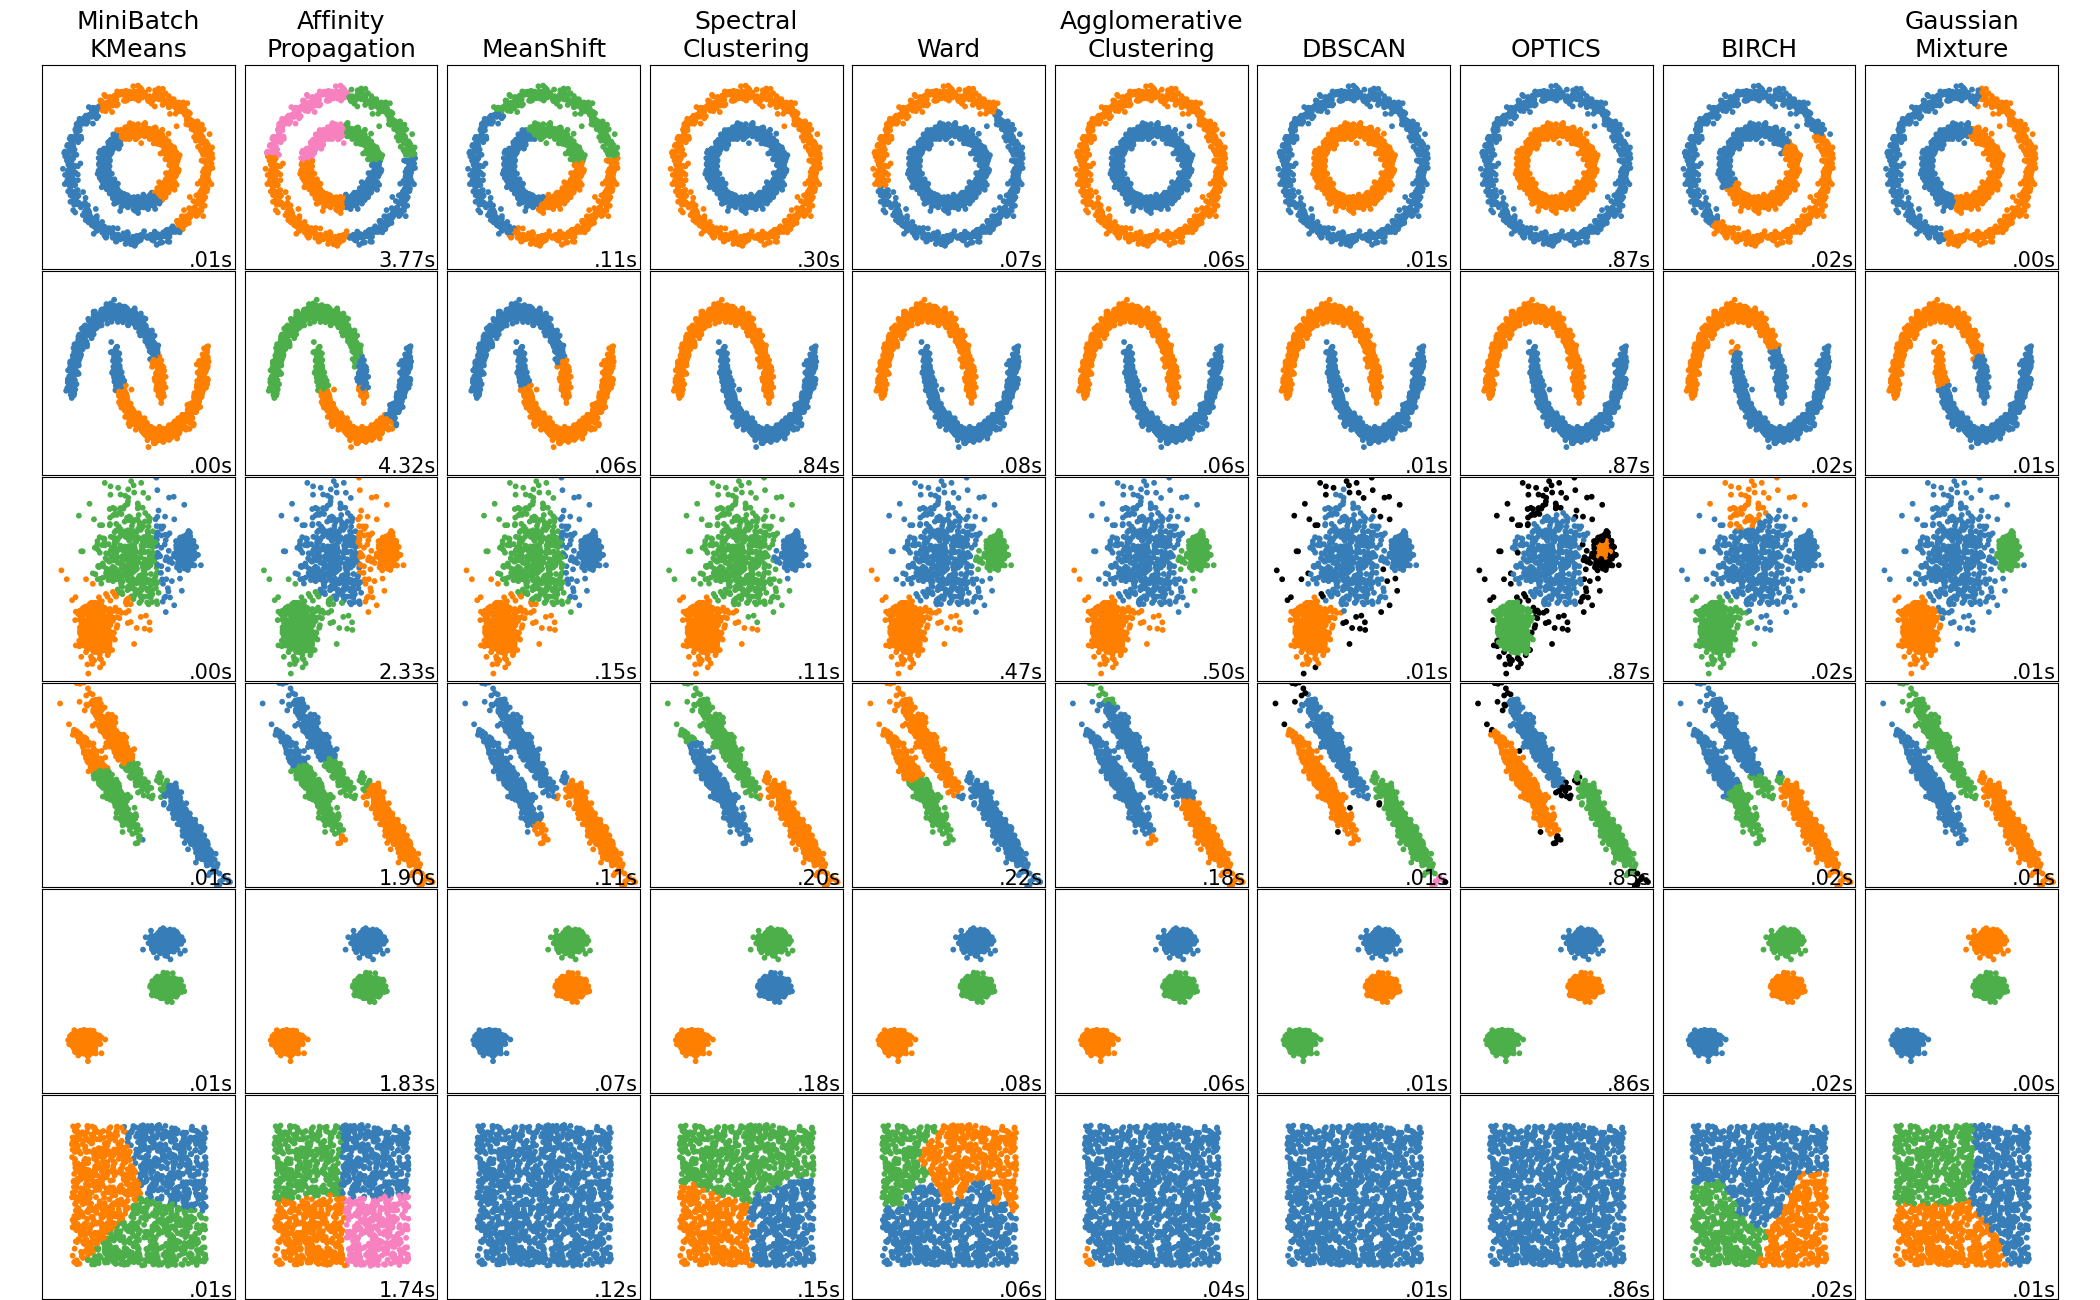

#### Data Preparation

При кластеризации вычисляется расстояние либо схожесть объектов по всем фичам, поэтому важно, чтобы фичи имели схожий масштаб.

Способы масштабирования данных:  
1.Нормальзация/стандартизация: MinMaxScaler, StandardScaler, RobustScaler (вычитаем медиану   делим на межквартильный размах). Подходит для данных, распределенных по Гауссу.  
2. Логарифмическое преобразование. Это Бокс-Кокс и PowerTransformer. Подходит для данных со степенным распеределением.  
3. Преобразование с использованием квантилей. Подходит, если распределение данных неизвестно.  
  Работает так:
  - выбрать количество квантилей/интервалов
  - поделить объекты так, чтобы в каждом интервале было одинаковое количество объектов
  - поквантильно перевести объекты в нормальное или равномерное распределение. 
  В sklearn это QuantileTransformer
  
[подробнее с тестом и картинками тут](https://developers.google.com/machine-learning/clustering/prepare-data)

### KMeans clustering

Как работает kmeans:
1. определить количество кластеров  
2. Для каждого кластера рандомно выбрать объект, который будет центром кластера, это центроид  
3. Для каждого объекта вычислить расстояния до всех центроидов, выбрать ближайший, отнести к кластеру этого центроида  
4. В каждом кластере заново найти центроид как среднее всех объектов в кластере  
5. Повторять шаги 3 и 4 пока центроиды меняются, либо пока не прошло количество итераций до остановки алгоритма  

![kmeans_gif](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif)

**Плюсы kmeans**:
1. простой понятный
2. Скейлит датасеты, гарантирует слияние нескольких признаков в один   
4. Легко кластеризует новые объекты

**Минусы kmeans**:
1. Нужно вручную задавать количество кластеров  
2. Результат зависит от начальных значений центроидов и количества кластеров  
3. Плохо работает с данными, где кластера разного размера и плотности  
4. Чувствителен к выбросам и никак их не помечает  
5. Проклятье размерности: с ростом количества фичей метрики расстояния сходятся к постоянному значению между любыми двумя объектами

[здесь подробнее](https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages)

И картинка для проклятья размерности:



#### и таки немного кода

In [152]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

KMeans().get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

алгоритм auto: по умолчанию используется EM алгоритм правдоподобия для плотных данных и elkan для разреженных  
алгоритм k-means++ выбора центроидов:  
* Возьмите один центроид $c_1$, выбранный случайным образом из набора данных. 
* Возьмите новый центр $c_i$, выбрав экземпляр $\mathbf{x}_i$ с вероятностью: $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$ где $D(\mathbf{x}_i)$ расстояние между экземплярами $\mathbf{x}_i$ и ближайший центроид, который уже был выбран. Такое распределение вероятностей гарантирует, что экземпляры, которые находятся дальше от уже выбранных центроидов, с большей вероятностью будут выбраны в качестве центроидов.

n_init: сколько раз запускается kmeans
tol: ограничение на близость двух кластеров

#### как выбрать оптимальную модель либо количество кластеров

**Вариант 1: инерция**  
в kmeans есть встроенная метрика - inertia
это сумма квадратов расстояний между каждым  объектом и его ближайшим центроидом
нельзя просто взять разбиение с минимальной инерцией, т к тогда количество кластеров будет равно количеству объектов.  
Предполагается, что если построить график количество кластеров - инерция, то будет виден перелом, и он то нам и нужен

Populating the interactive namespace from numpy and matplotlib


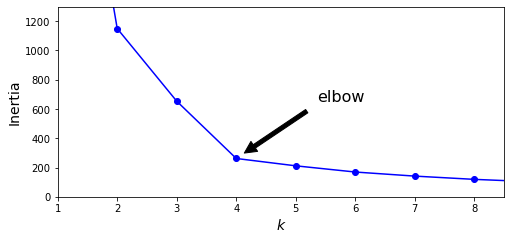

In [154]:
%pylab inline
import warnings
warnings.filterwarnings('ignore')
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

**Вариант 2: silhouette score**  
_silhouette_score_ это средний _silhouette_coefficient_ по всем объектам выборки  
_silhouette coefficient_ объекта равен  

$$
\begin{align}(b - a) / \ max(a, b) \end{align}$$

где $a$ - среднее расстояние внутри кластера,   
$b$ - это среднее расстояние до ближайшего кластера.  
Коэффициент силуэта может варьироваться от -1 до +1:   
**1**  означает, что экземпляр находится внутри своего собственного кластера и далеко от других кластеров,  
**0**  означает, что он находится близко к границе кластера    
**-1** означает, что объект мог попасть не в тот кластер. 

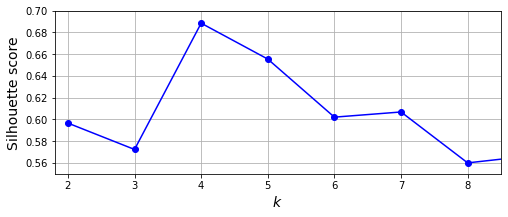

In [155]:
# и эта визуализация для меня намного понятнее предыдущей, + здесь видно что и количество кластеров 5 тоже неплохо
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()
plt.show()

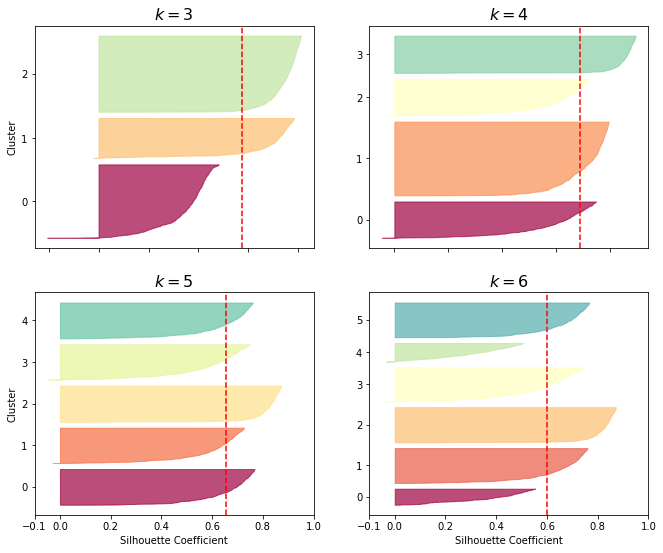

In [156]:
# silhouette diagram
# пунктир - silhouette score,  в идеале каждый кластер должен до него дотягиваться
# предполагается, чем равномернее кластера, тем лучше разделение

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

#### Как еще оценить качество кластеризации. Версия Гугла

[Туториал, из которого картинка](https://developers.google.com/machine-learning/clustering/interpret)  
[Colab с кодом](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/clustering/clustering-manual-similarity.ipynb)

### DBSCAN

**Density-Based Spatial Clustering of Applications with Noise**  
Алгоритм, основанный на гипотезе, что области с высокой плотностью объектов схожи: находят точки в области максимальной плотности, обозначает их как core point, и начинает из нее экспансию кластера.
Хорошо работает:
1. На данных с кластерами одинаковой плотности, которые разделены разреженными данными  
2. На больших датасетах   
3. С кластерами произвольной формы  
4. А еще он быстрый

Ключевые параметры:  
1. eps: максимальное расстояние между объектами, чтобы один из них считался соседом другого  
2. min_samples: количество объектов рядом с объектом, для которого считается окрестность.

Определения:
1. Для каждого объекта считает, сколько объектов находятся на расстоянии меньше eps, это будет эпсилон окрестность объекта  
2. Если в окрестности объекта как минимум min_samples объектов, то он будет отмечен как корневой  
3. Все объекты в этой окрестности принадлежат к одному кластеру. Один кластер может содержать множество корневых объектов  
4. Объект считается граничным, если он находится в эпсилон окрестности хотя бы одного корневого объекта  
5. Если у объекта нет ни одного корневого в окрестности, то это шум. Метка класса -1  

Как работает:
1. Проходит по всем неразмеченным объектам в выборке
2. Если не выполняется условие корневого объекта, то объект временно помечается как шумовой  
3. Если объект корневой, то он пораждает новый кластер. Все объекты из этого нового кластера, неразмеченные и корневые, добавляются в этот кластер, корневые вместе со своими окрестностями. Если он не корневой, то он точно оказался граничным для этого нового кластера.
4. Возврат к неразмеченным объектам.  
Т е есть 2 цикла, внешний перебирает неразмеченные объекты, внутренний наращивает кластер.

In [52]:
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)
print(dbscan.labels_[:10])
print(len(dbscan.core_sample_indices_))

[ 0  2 -1 -1  1  0  0  0  2  5]
808


In [36]:
# core instances
dbscan.components_[:2]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695]])

In [37]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

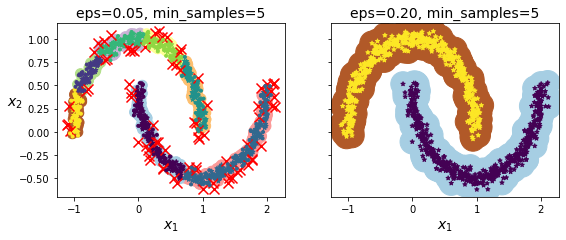

In [53]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)
    
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

реализация DBSCAN в sklearn не имеет метода predict(), но имеет fit_predict()
Для кластеризации новых объектов авторы предлагают использовать другие методы, например KNN

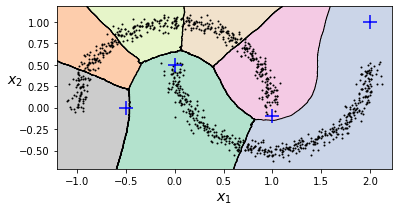

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

#### Как найти eps

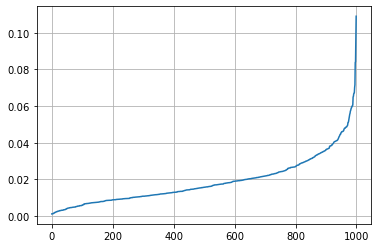

In [46]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.grid()

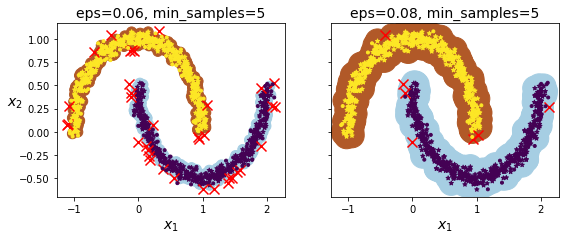

In [55]:
# тут, похоже, ок, если епсилон от 0.06 до 0.08
dbscan3 = DBSCAN(eps=0.06)
dbscan3.fit(X)

dbscan4 = DBSCAN(eps=0.08)
dbscan4.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan3, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan4, X, size=600, show_ylabels=False)

plt.show()

### Gaussian mixtures
[статья про микстуры](https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/)  
[видео](https://www.youtube.com/watch?v=DODphRRL79c)

#### Motivating GMM: Weaknesses of k-Means

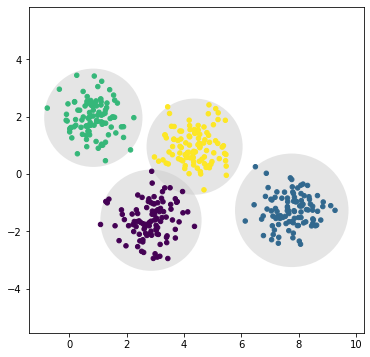

In [86]:
plt.figure(figsize=(6, 6))

from scipy.spatial.distance import cdist

X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
        
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

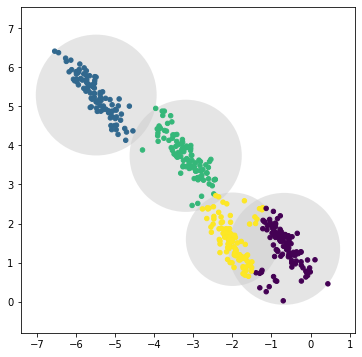

In [88]:
plt.figure(figsize=(6, 6))
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

минусы kmeans:
1. Стремится придать кластерам сферическую форму  
2. Отсутсвие вероятностного назначения центров кластеров  
Обобщение модели до сравнивания расстояния от объектов до всех центров кластеров и допущение, что кластера могут быть не круглыми - это GMM

Гауссовы смеси — это вероятностная модель, которая предполагает, что все точки данных генерируются из смеси конечного числа гауссовых распределений  
Все объекты, сгенеированные из одного гауссова распределения, формируют один кластер, который обычно выглядит как эллипс   
Каждый кластер описывается центром, ковариационной матрицей и весом, с которым гауссиана, сформировавшая его, входит в смесь.  
Кластеры могут иметь разные формы, размеры, плотности и направление.  


GMM относится к мягкой кластеризации, т е для каждого объекта определяется вероятность принадлежности кластерам, поэтому у GaussianMixture есть и predict, и predict_proba

**Generalizing EM: Gaussian Mixture Models**   
Гауссова смесь - это взвешенная сумма всех гауссиан  
$$pi_k = P(Z = k)$$

pi_k означает вероятность принадлежности к-ой гауссиане, оно же вероятность принадлежности к конкретному кластеру   
pi_k принадлежит отрезку [0, 1]  
Т е существует некая скрытая неизвестная переменная Z, которую нельзя измерить, но каждое из этих Z вызывает возникновение гауссианы, и на данных виден суммарный эффект от всех отдельных Z. 

GMM, как и kmeans, использует ЕМ подход:

**E-step**: для каждого объекта найти вероятность принадлежности каждому кластеру
    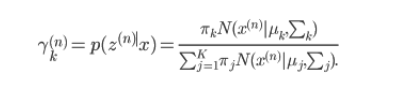

**M-step**:  перерасчёт всех параметров гауссиан: среднего значения (центр кластера), ковариации (она же дисперсия, отвечает за форму и ориентацию кластера) и pi_k (он же вес). Взвешивается влияние каждого объекта на параметр через принадлежность. Если принадлежность мала, то и x в общем подсчёте будет мало значить:
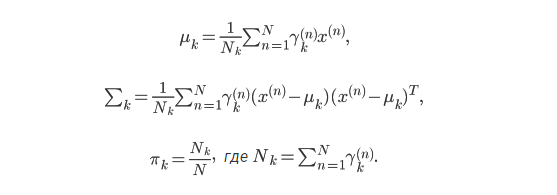

Т е для каждого кластера пересчитываются его параметры, на всей выборке

Как и kmeans, этот алгоритм может не найти глобальный оптимум, поэтому на практике его запускают несколько раз

**Сравнение kmeans & GMM**
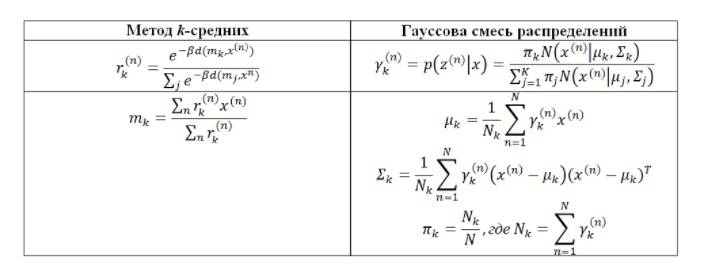

Схожесть:
1. У обоих первым этапом является расчёт принадлежностей, а вторым – расчёт параметров модели.
2. GMM, как и kmeans, также требуют подбора количества кластеров.
3. Выражения для вычисления среднего одинаковы
4. Чувствительны к выбору начальных параметров

Отличия:
1. kmeans подразумевает поиск кластеров одинакового веса, т к нём нет переменной pi, что эквивалентно равности всех значений pi. 
2. kmeans имеет лишь переменную β, тогда как у GMM есть полная ковариационной матрица. Это позволяет GMM быть намного более гибкими в вопросе формы распределений и рассматривать любого рода эллиптические формы с любой ориентацией.
3. У GMM мягкая кластеризация, у kmeans жесткая

Таким образом, kmeans можно рассматривать как случай GMM, в котором каждый кластер имеет одинаковый вес, сферообразную форму и одинаковый радиус.  

Можно делать гибриды GMM & kmenas:
1. GMM, но с жесткой кластеризацией
2. GMM-EM, но все кластеры сферические и т д

[статья](https://craftappmobile.com/1073-2/)

In [95]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=20, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

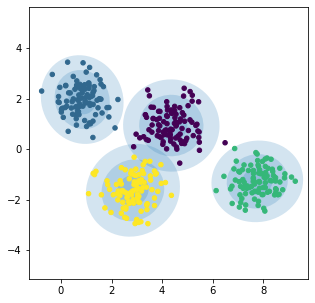

In [100]:
from sklearn.mixture import GaussianMixture
plt.figure(figsize=(5, 5))
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)

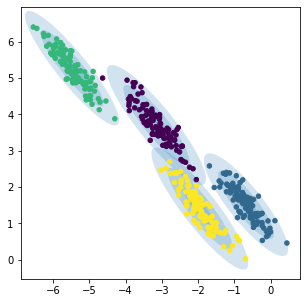

In [103]:
plt.figure(figsize=(5, 5))
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

In [108]:
# Результаты запуска алгоритма и параметры модели:
print('алгоритм сошелся?', gmm.converged_)
print('сколько итераций?', gmm.n_iter_)

print('веса:', gmm.weights_)
print('means:')
display(gmm.means_)
print('матрицы ковариаций')
gmm.covariances_

алгоритм сошелся? True
сколько итераций? 6
веса: [0.25455991 0.24960937 0.24856308 0.24726764]
means:


array([[-3.15090783,  3.71109673],
       [-0.68373205,  1.51591598],
       [-5.4736886 ,  5.27447425],
       [-1.95405049,  1.40907606]])

матрицы ковариаций


array([[[ 0.20718288, -0.22448647],
        [-0.22448647,  0.30342679]],

       [[ 0.15012765, -0.15798472],
        [-0.15798472,  0.22221707]],

       [[ 0.18632125, -0.20655164],
        [-0.20655164,  0.27558183]],

       [[ 0.19777594, -0.22402528],
        [-0.22402528,  0.31418505]]])

In [114]:
# т к модель генеративная, можно получить несколько новых сэмплов, 
# которые выбираются последовательно из каждого кластера
X_new, y_new = gmm.sample(6)
display(X_new)
y_new

array([[-2.62440536,  3.14112243],
       [-0.66368658,  1.7425209 ],
       [-0.53377961,  1.19706816],
       [-0.58571793,  1.16281406],
       [-4.27892901,  4.00602774],
       [-2.49152137,  1.71400384]])

array([0, 1, 1, 1, 2, 3])

#### Как выбрать число компонент

Inertia & silhouette_score не подойдут, т к кластеры не сферические.  
Вместо этого можно попытаться найти модель, которая минимизирует теоретический информационный критерий, такой как байесовский информационный критерий (BIC) или информационный критерий Акаике (AIC):

${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$

* $m$ - количество экземпляров. 
* $p$ - количество параметров, изученных моделью. 
* $\hat L$ - максимальное значение функции правдоподобия модели. Это условная вероятность наблюдаемых данных $\mathbf{X}$ с учетом модели и ее оптимизированных параметров.

И BIC, и AIC наказывают модели, у которых есть больше параметров для изучения, например, кластеров, и поощряют модели, которые дают высокую вероятность наблюдаемым данным.

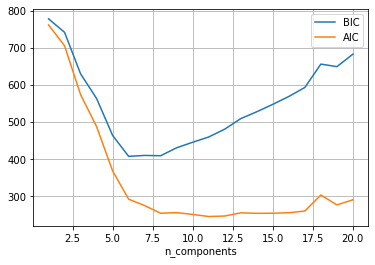

In [119]:
#AIC выбирает количество кластеров 7 - 8, BIC еще упрощает, и предлагает 5-6 кластеров.
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(Xmoon)
          for n in n_components]
plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.grid();

#### Bayesian Gaussian Mixture models

Для поиска оптимального количества кластеров можно использовать класс `BayesianGaussianMixture`, который зануляет веса ненужным кластерам. Поэтому достаточно установить количество компонентов большее, чем предполагаемое количество кластеров

[0.25 0.   0.25 0.25 0.25 0.   0.   0.   0.   0.  ]
n_clusters: 4


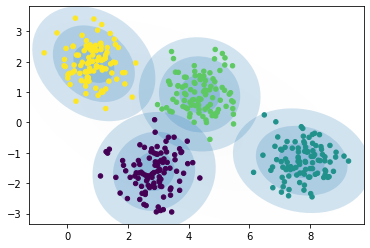

In [137]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
print(np.round(bgm.weights_, 2))
print('n_clusters:', len([w for w in bgm.weights_ if round(w, 2) > 0]))
plot_gmm(bgm, X)

[0.23 0.29 0.27 0.   0.21 0.   0.   0.   0.   0.  ]
n_clusters: 4


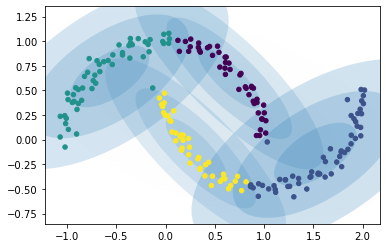

In [139]:
bgm_moons = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42, covariance_type='full')
bgm_moons.fit(Xmoon)
print(np.round(bgm_moons.weights_, 2))
print('n_clusters:', len([w for w in bgm_moons.weights_ if round(w, 2) > 0]))
plot_gmm(bgm_moons, Xmoon)

#### Поиск аномалий

Т к GMM  - алгоритм оценки плотности, то его можно использовать в задаче поиска аномалий, для этого достаточно определить порог плотности
Для оценки логарифма функции плотности вероятности есть метод score_samples()

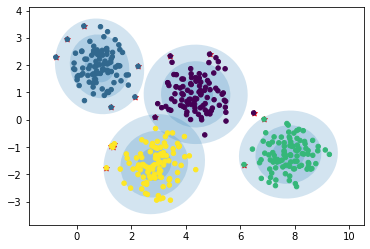

In [145]:
densities = gmm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

plot_gmm(gmm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*');

### Spectral Clustering

еще одно расширение алгоритма kmeans, в котором:  
 - объекты представляются как ноды графа, и задача переводится в задачу разбиения графа
 - ноды проецируются в пространство меньшей размерности
 - и kmeans

[тут подробнее](https://towardsdatascience.com/spectral-clustering-82d3cff3d3b7)

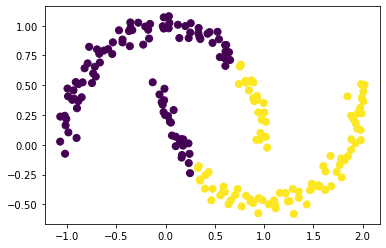

In [147]:
# снова картинка с результатами kmeans на лунах
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

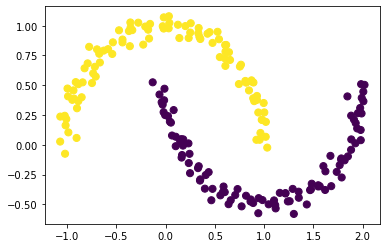

In [149]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');